# Requirements for future GraphSay Library

In [ ]:
!pip install transformers
!pip install datasets
!pip install torch

# Proof of Concept for Future GraphSay Library

In [2]:
import io
import os
from matplotlib.figure import Figure
from PIL import Image
from transformers import AutoProcessor, Pix2StructForConditionalGeneration
import torch
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np


class GraphSay:
    def __init__(self):
        self.processor = AutoProcessor.from_pretrained("oroikon/ft_pix2struct_chart_captioning")
        self.model = Pix2StructForConditionalGeneration.from_pretrained("oroikon/ft_pix2struct_chart_captioning")
        self.device = "cuda" if torch.cuda.is_available() else "cpu"
        self.model.to(self.device)

    def plot_to_png(self, plot: Figure) -> io.BytesIO:
        buf = io.BytesIO()
        plot.savefig(buf, format='png')
        buf.seek(0)
        return buf

    def plotly_to_matplotlib(self, plot: go.Figure) -> Figure:
        # Extract data from Plotly figure
        plot_data = plot.data[0]  # Assuming one trace
        x_data = plot_data['x']
        y_data = plot_data['y']

        # Recreate the plot using Matplotlib
        matplotlib_fig, ax = plt.subplots()
        ax.scatter(x_data, y_data)
        ax.set_title(plot.layout.title.text)
        ax.set_xlabel(plot.layout.xaxis.title.text)
        ax.set_ylabel(plot.layout.yaxis.title.text)

        return matplotlib_fig

    def generate_caption(self, plot) -> str:
        # Check if the input plot is a plotly graph_objects Figure
        if isinstance(plot, go.Figure):
            matplotlib_fig = self.plotly_to_matplotlib(plot)
            image_stream = self.plot_to_png(matplotlib_fig)
        else:  # we assume it's a matplotlib figure
            image_stream = self.plot_to_png(plot)

        image = Image.open(image_stream)

        # Preprocess the image and prepare it for input into your model.
        inputs = self.processor(images=image, return_tensors="pt", max_patches=2048).to(self.device)
        flattened_patches = inputs.flattened_patches
        attention_mask = inputs.attention_mask

        # Generate caption
        generated_ids = self.model.generate(flattened_patches=flattened_patches, attention_mask=attention_mask, max_length=100)
        generated_caption = self.processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

        return generated_caption


In [ ]:
!pip install -U matplotlib seaborn plotly
!pip install fastapi python-multipart uvicorn

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
#from GraphSay import GraphSay  # When the library is done GraphSay.py will be accessible to access the GraphSay class stated above

# Generate some random data for plotting
np.random.seed(0)
x = np.random.rand(100)
y = np.random.rand(100)

# Create a scatter plot using matplotlib
plt.figure()
plt.scatter(x, y)
plt.title("Ocean of Stars in the United States in 2015")
plt.xlabel("Stars")
plt.ylabel("Brightness")
matplotlib_fig = plt.gcf()  # Getting the current figure to pass to GraphSay

# Create a scatter plot using seaborn
sns_fig = sns.scatterplot(x=x, y=y).get_figure()
plt.title("Ocean of Stars in the United States in 2015")
plt.xlabel("Stars")
plt.ylabel("Brightness")

# Create a scatter plot using plotly
plotly_fig = px.scatter(x=x, y=y, title="Cosmic Dance in the United States in 2015", labels={'x':'Stars', 'y':'Brightness'})

# Initialize GraphSay with the name of the pre-trained model you want to use
graph_say = GraphSay()



# Matplotlib

Matplotlib plot


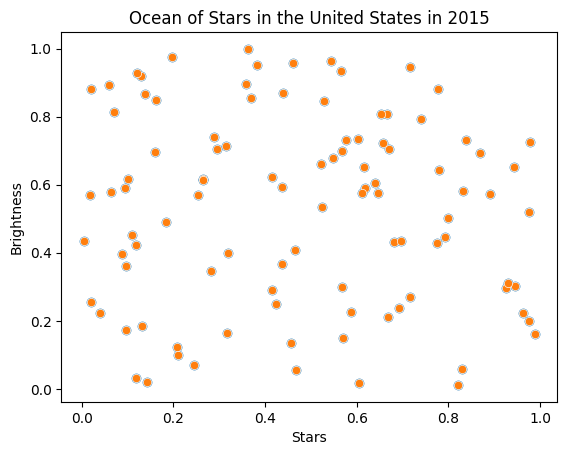

In [12]:
print("Matplotlib plot")
matplotlib_fig

In [9]:
# Generate captions for the matplotlib plot
caption_matplotlib = graph_say.generate_caption(matplotlib_fig)
print("Generated caption for matplotlib plot:", caption_matplotlib)


Matplotlib plot
Generated caption for matplotlib plot: This statistic shows the Ocean of Stars in the United States in 2015. In 2015, the Ocean of Stars was 0.2 percent of the total number of stars in the United States. 


# Seaborn

Seaborn plot


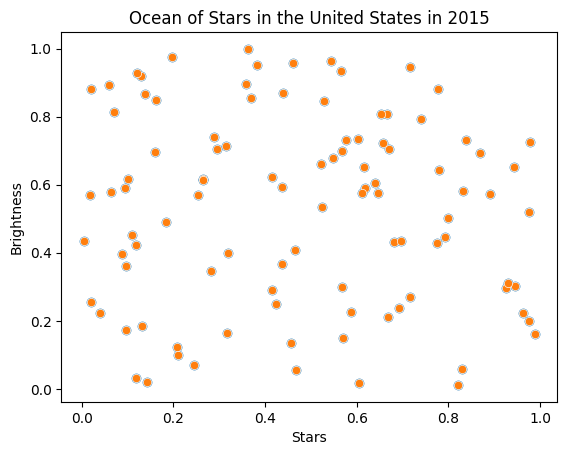

In [13]:
print("Seaborn plot")
sns_fig

In [10]:
# Generate captions for the seaborn plot
caption_seaborn = graph_say.generate_caption(sns_fig)
print("Generated caption for seaborn plot:", caption_seaborn)



Seaborn plot
Generated caption for seaborn plot: This statistic shows the Ocean of Stars in the United States in 2015. In 2015, the Ocean of Stars was 0.2 percent of the total number of stars in the United States. 


# Plotly

In [14]:
print("Plotly plot")
plotly_fig

Plotly plot


Plotly plot
Generated caption for plotly plot: This statistic shows the total number of Cosmic Dance in the United States in 2015. In 2015, 1.0 percent of the U.S. adults were dancing in the 'Cosmic Dance' category. 


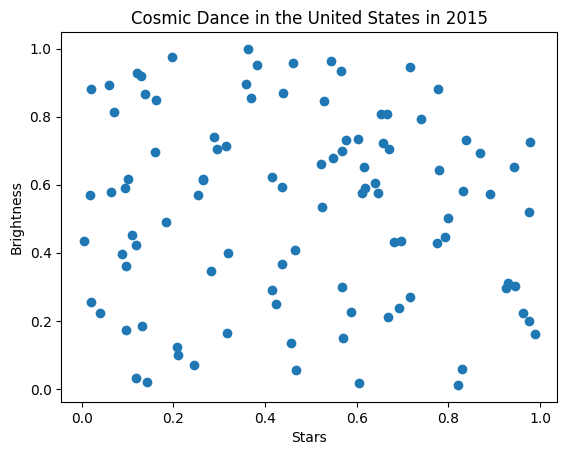

In [11]:

# Generate captions for the plotly plot
caption_plotly = graph_say.generate_caption(plotly_fig)
print("Plotly plot")
plotly_fig
print("Generated caption for plotly plot:", caption_plotly)